# Homework 3 Part 2 - Solutions

**This is an individual assignment.**

---

Write your own code and justify all your answers. You may repurpose any functions built during lecture. You may use ```scikit-learn``` functions.

---

In [1]:
# Import libraries and magics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Exercise 1 (10 points)

**Consider the dataset we worked with in class:**

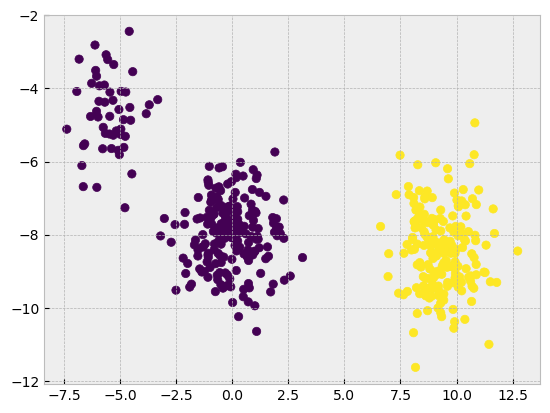

In [2]:
X = np.load('data.npy')
t = np.load('labels.npy')

plt.scatter(X[:,0], X[:,1], c=t);

1. (8 points) **Solve for the parameters ($\mathbf{w}$ and $w_0$) of the discriminant function you solved for in HW3-Part1-Q1. Plot the corresponding discriminant function.**

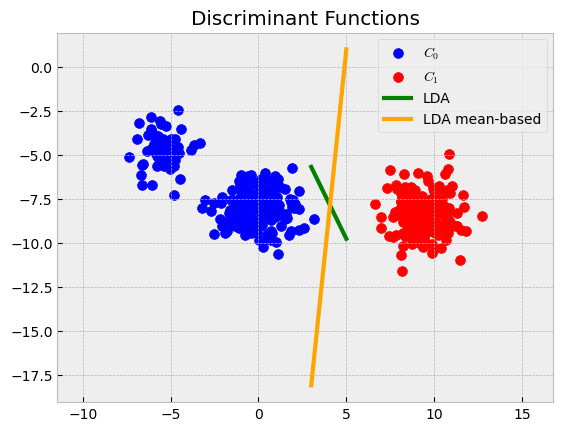

In [3]:
x = np.linspace(3,5,X.shape[0])
y = np.linspace(-20,5,X.shape[0])
Ymesh, Xmesh = np.meshgrid(y, x)
xy = np.vstack([Xmesh.ravel(), Ymesh.ravel()]).T

# SVM
svm = SVC(kernel='linear')
svm.fit(X,t)
w_svm = svm.coef_[0]
w0_svm = svm.intercept_[0]
y_svm = svm.decision_function(xy).reshape(Xmesh.shape)

# Logistic Regression
lr = SGDClassifier(loss='log_loss', alpha=0, fit_intercept=True, eta0=0.01, learning_rate='constant')
lr.fit(X,t)
w_lr = lr.coef_[0]
w0_lr = lr.intercept_[0]
y_lr = w0_lr/w_lr[1] - (w_lr[0]/w_lr[1])*x

# LDA
m1 = np.mean(X[t==0,:],axis=0).reshape(-1,1)
m2 = np.mean(X[t==1,:],axis=0).reshape(-1,1)
SB = (m2-m1)@(m2-m1).T
SW = (X[t==0,:]-m1.T).T@(X[t==0,:]-m1.T) + (X[t==1,:]-m2.T).T@(X[t==1,:]-m2.T)
L, E = np.linalg.eigh(np.linalg.inv(SW)@SB)
w_lda = E[:,-1]
w0_lda = (m1+m2).T@w_lda/2
y_lda = w0_lda/w_lda[1] - (w_lda[0]/w_lda[1])*x

# LDA HW2-P1-Q1
L, E = np.linalg.eigh(SB)
w_lda_means = E[:,-1]
w0_lda_means = (m1+m2).T@w_lda_means/2
y_lda_means = w0_lda_means/w_lda_means[1] - (w_lda_means[0]/w_lda_means[1])*x

plt.scatter(X[t==0, 0], X[t==0, 1], c='blue', s=50, label='$C_0$')
plt.scatter(X[t==1, 0], X[t==1, 1], c='red', s=50, label='$C_1$')
# plt.contour(Xmesh, Ymesh, y_svm, colors='k',levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.plot(x, y_lda,'green',linewidth=3, label='LDA')
plt.plot(x, y_lda_means,'orange',linewidth=3, label='LDA mean-based')
# plt.plot(x, y_lr,'green',linewidth=3, label='Logistic Regression')
plt.title('Discriminant Functions');plt.axis('equal'); plt.legend(loc='best',fontsize=10);

2. (2 points) **Compare your solution with the standard LDA discriminant function.**

In [4]:
distances_to_discriminant_lda = np.abs(X@w_lda+w0_lda)/np.linalg.norm(w_lda)
distances_to_discriminant_proposed = np.abs(X@w_lda_means+w0_lda_means)/np.linalg.norm(w_lda_means)

distances_to_discriminant_lda_C0 = np.abs(X[t==0,:]@w_lda+w0_lda)/np.linalg.norm(w_lda)
distances_to_discriminant_proposed_C0 = np.abs(X[t==0,:]@w_lda_means+w0_lda_means)/np.linalg.norm(w_lda_means)

distances_to_discriminant_lda_C1 = np.abs(X[t==1,:]@w_lda+w0_lda)/np.linalg.norm(w_lda)
distances_to_discriminant_proposed_C1 = np.abs(X[t==1,:]@w_lda_means+w0_lda_means)/np.linalg.norm(w_lda_means)

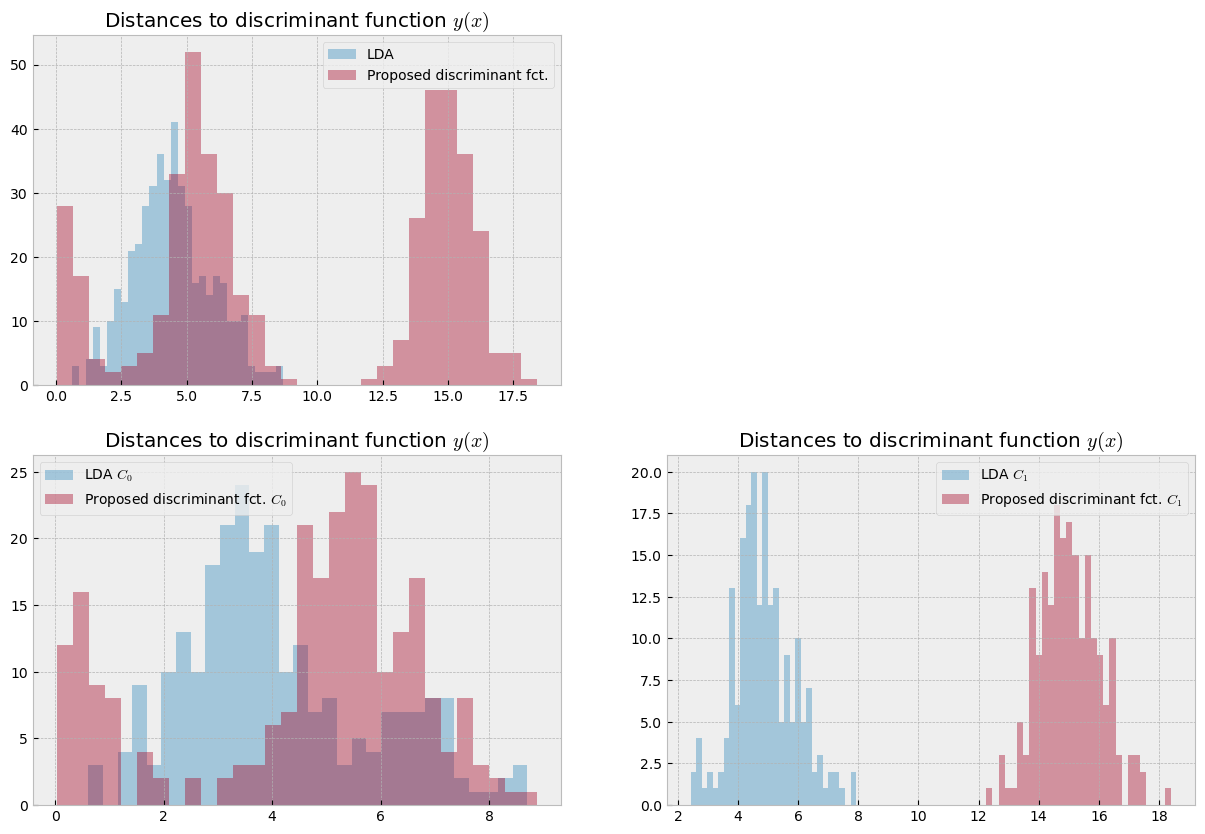

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.hist(distances_to_discriminant_lda, bins=30, label='LDA', alpha=0.4)
plt.title('LDA\nDistances to discriminant function')
plt.hist(distances_to_discriminant_proposed, bins=30, label='Proposed discriminant fct.', alpha=0.4)
plt.title('Distances to discriminant function $y(x)$'); plt.legend()

plt.subplot(2,2,3); plt.hist(distances_to_discriminant_lda_C0, bins=30, label='LDA $C_0$', alpha=0.4)
plt.title('LDA\nDistances to discriminant function')
plt.hist(distances_to_discriminant_proposed_C0, bins=30, label='Proposed discriminant fct. $C_0$', alpha=0.4)
plt.title('Distances to discriminant function $y(x)$'); plt.legend()

plt.subplot(2,2,4); plt.hist(distances_to_discriminant_lda_C1, bins=30, label='LDA $C_1$', alpha=0.4)
plt.title('LDA\nDistances to discriminant function')
plt.hist(distances_to_discriminant_proposed_C1, bins=30, label='Proposed discriminant fct. $C_1$', alpha=0.4)
plt.title('Distances to discriminant function $y(x)$'); plt.legend()

In [6]:
print('Average distance to discriminant with LDA = ', np.mean(distances_to_discriminant_lda))
print('Average distance to discriminant with proposal = ', np.mean(distances_to_discriminant_proposed))

Average distance to discriminant with LDA =  4.435015776285724
Average distance to discriminant with proposal =  9.234078134409268


It clear from the plot above that the distances to the discriminant function with the proposed solution are larger for the majority of points. But at the same time, there are a considerable amount of sample that are closer to the discriminant function, specially those from $C_0$.

# Exercise 2 (35 points)

**In this problem you will be working with the [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) from ```scikit-learn```. The dataset contains 1797 samples. Each sample is a 64-dimensional vector representing all pixels of a $8\times 8$ grayscale image of a handwritten digit. There are a total of 10 digits (10 targets) and about 180 images per digit. Let's load the data:**

In [7]:
from sklearn.datasets import load_digits

digits = load_digits(return_X_y=False)

# print(digits.DESCR)

In [8]:
X = digits.data # training data
t = digits.target # target values

X.shape, t.shape

((1797, 64), (1797,))

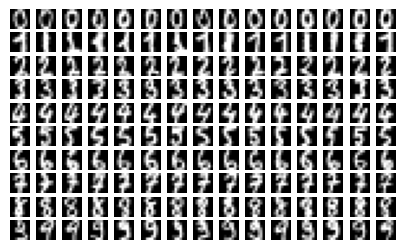

In [9]:
plt.figure(figsize=(5,3))
grid=1
for j in range(10):
    loc = np.where(t==j)[0]
    idx_rd = np.random.choice(loc,15,replace=False)
    for i in range(15):
        plt.subplot(10,15,grid)
        plt.imshow(X[idx_rd[i],:].reshape(8,8), cmap='gray')
        plt.axis('off')
        grid+=1

**Consider the following training-test split and use it for the next set of questions:**

In [22]:
# Partitioning the data into training and test

X_train, X_test, t_train, t_test = train_test_split(X, t, stratify=t, test_size=0.2, random_state=0)

1. (2.5 points) **Create a ```Pipeline``` object to train a Logistic Regression classifier (```SGDClassifier```). Make sure to use the proper objective function (parameter ```loss```) and include a scaling step in the pipeline.**

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model 2 - Logistic Regression
lr = Pipeline([('scaler', MinMaxScaler()),
              ('LR', SGDClassifier(eta0=0.1))])

2. (5 points) **Carry experimental design to tune 2 hyperparameters, the learning rate scheduler and the Ridge regularizer parameter. In your grid search object, consider a 10-fold CV scheme.**

In [29]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'LR__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'LR__alpha': [0.001, 0.01, 0.1, 0.5, 0.8]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(lr,
                           param_grid=param_grid,
                           cv=KFold(10,shuffle=True,random_state=0),
                           scoring='accuracy',
                           refit = True,
                           verbose=2)

# Find the best parameters using the training data
grid_search.fit(X_train, t_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
lr_best = grid_search.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END ........LR__alpha=0.001, LR__learning_rate=constant; total time=   0.0s
[CV] END .........LR__alpha=0.001, LR__learning_rate=optimal; total time=   0.0s
[CV] END .........LR__alpha=0.001, LR__learnin

[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.0s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.1, LR__learning_rate=adaptive; total time=   0.1s
[CV] END ..........LR__alpha=0.5, LR__learning_rate=constant; total time=   0.0s
[CV] END ..........LR__alpha=0.5, LR__learning_rate=constant; total time=   0.0s
[CV] END ..........LR__alpha

3. (5 points) **Report performance in test set including accuracy, f1-score and confusion matrices. Compare performances between all classifiers.**

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.95      0.97      0.96       146
           2       0.99      1.00      1.00       142
           3       0.99      0.97      0.98       146
           4       1.00      0.99      0.99       145
           5       0.97      0.99      0.98       145
           6       0.98      0.98      0.98       145
           7       0.99      0.99      0.99       143
           8       0.97      0.94      0.95       139
           9       0.96      0.97      0.97       144

    accuracy                           0.98      1437
   macro avg       0.98      0.98      0.98      1437
weighted avg       0.98      0.98      0.98      1437



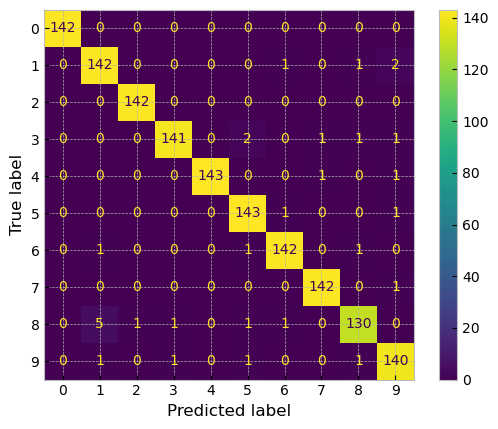



TEST SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.97      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.92      0.96        37
           4       1.00      0.94      0.97        36
           5       0.95      1.00      0.97        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.86      0.91      0.89        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



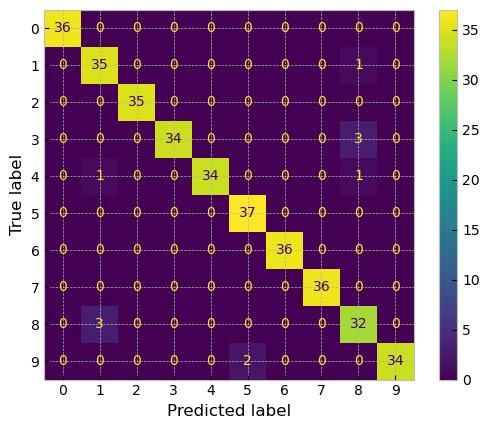

In [30]:
# Making predictions train/test
y_train = lr_best.predict(X_train)
y_test  = lr_best.predict(X_test)

# Displaying results
print('TRAINING SET')
print(classification_report(t_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(t_train, y_train), 
                                           display_labels=digits.target_names)
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(t_test, y_test))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(t_test, y_test), 
                                           display_labels=digits.target_names)
disp_test.plot();

4. (5 points) **Visualize images that were misclassified in test. Provide a discussion on your observations and what procedures could you take to improve results on the bets performing classifier.**

Misclassified Test Samples with Logistic Regression
Total =  11
Indices =  [ 15  56  67  82 104 179 184 240 242 328 333]


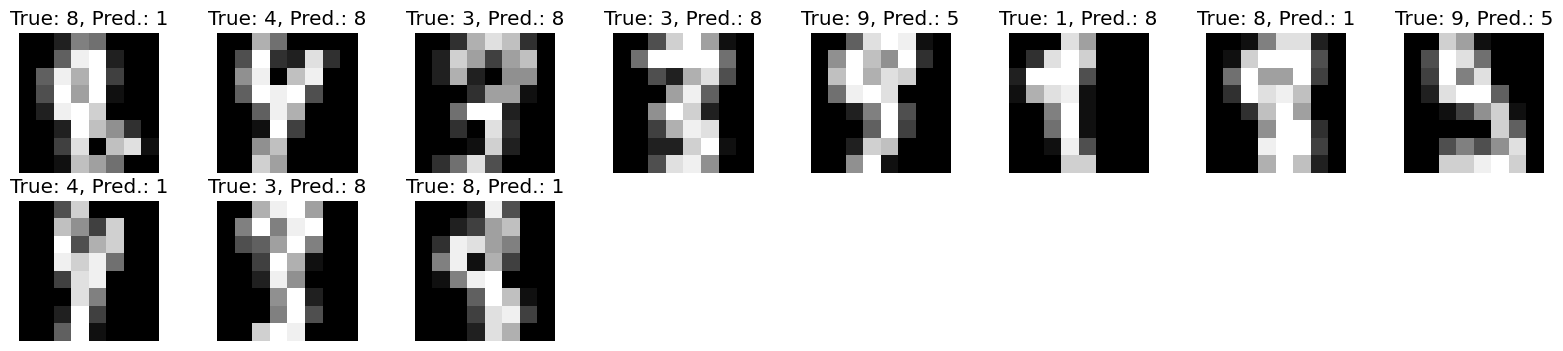

In [31]:
idx = np.where(t_test!=y_test)[0]

print('Misclassified Test Samples with Logistic Regression')
print('Total = ',len(idx))
print('Indices = ', idx)
plt.figure(figsize=(20,4))
for i in range(len(idx)):
    plt.subplot(2,8,i+1); plt.imshow(X_test[idx[i],:].reshape(8,8), cmap='gray'); plt.axis('off')
    plt.title('True: '+str(t_test[idx[i]])+', Pred.: '+str(y_test[idx[i]]))

5. (2.5 points) **Create a ```Pipeline``` object to train a Support Vector Machine classifier (```SVC```). Make sure to include a scaling step in the pipeline.**

In [32]:
# Model 2 - SVM
svm = Pipeline([('scaler', MinMaxScaler()),
                ('SVM', SVC())])

6. (5 points) **Carry experimental design to tune 2 hyperparameters, the kernel function and the regularization parameter.  In your grid search object, consider a 10-fold CV scheme.**

In [35]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'SVM__C': [1,1E2,1E3,1E4,1E5,1E6,1E7,1E8,1E9]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(svm,
                           param_grid=param_grid,
                           cv=KFold(10,shuffle=True,random_state=0),
                           scoring='accuracy',
                           refit = True,
                           verbose=2)

# Find the best parameters using the training data
grid_search.fit(X_train, t_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
svmrbf_best = grid_search.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .......................SVM__C=1, SVM__kernel=linear; total time=   0.0s
[CV] END .........................SVM__C=1, SVM__kernel=poly; total time=   0.0s
[CV] END .........................SVM__C=1, SV

[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .....................SVM__C=1000.0, SVM__kernel=rbf; total time=   0.0s
[CV] END .................SVM__C=1000.0, SVM__kernel=sigmoid; total time=   0.0s
[CV] END .................SVM__C=1000.0, SVM__kernel=sigmoid; total time=   0.0s
[CV] END .................SVM__C=1000.0, SVM__kernel=sigmoid; total time=   0.0s
[CV] END .................SVM__C=1000.0, SVM__kernel=sigmoid; total time=   0.0s
[CV] END .................SV

[CV] END ...............SVM__C=1000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ...............SVM__C=1000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ...............SVM__C=1000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SVM__C=1000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END .................SV

[CV] END ............SVM__C=100000000.0, SVM__kernel=sigmoid; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ............SVM__C=1000000000.0, SVM__kernel=linear; total time=   0.0s
[CV] END ..............SVM__C=1000000000.0, SVM__kernel=poly; total time=   0.0s
[CV] END ..............SVM__

7. (5 points) **Report performance in test set including accuracy, f1-score and confusion matrices. Compare performances between all classifiers.**

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00       145
           5       1.00      1.00      1.00       145
           6       1.00      1.00      1.00       145
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       139
           9       1.00      1.00      1.00       144

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



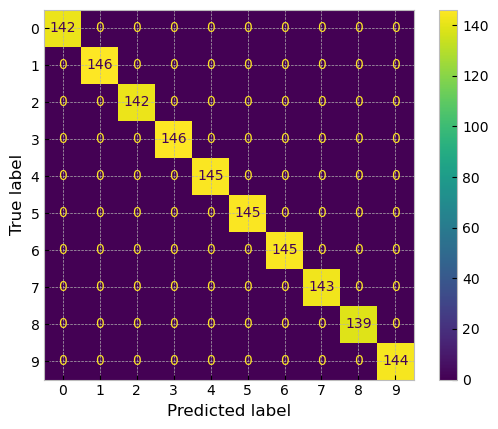



TEST SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.99        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



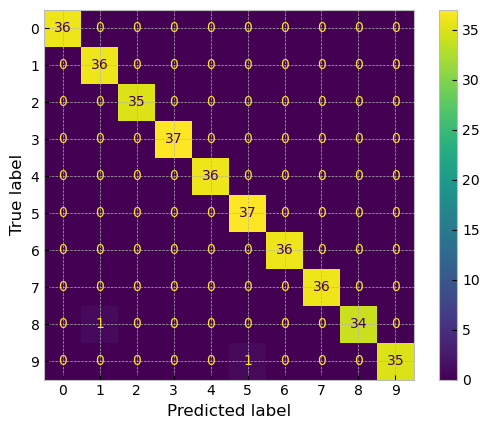

In [36]:
# Making predictions train/test
y_train = svmrbf_best.predict(X_train)
y_test  = svmrbf_best.predict(X_test)

# Displaying results
print('TRAINING SET')
print(classification_report(t_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(t_train, y_train), 
                                           display_labels=digits.target_names)
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(t_test, y_test))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(t_test, y_test), 
                                           display_labels=digits.target_names)
disp_test.plot();

8. (5 points) **Visualize images that were misclassified in test. Provide a discussion on your observations and what procedures could you take to improve results on the bets performing classifier.**

Misclassified Test Samples
Total =  2
Indices =  [ 15 240]


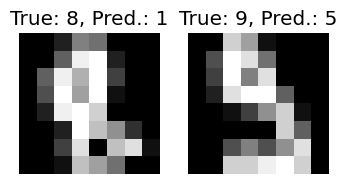

In [37]:
idx = np.where(t_test!=y_test)[0]

print('Misclassified Test Samples')
print('Total = ',len(idx))
print('Indices = ', idx)
plt.figure(figsize=(4,2))
plt.subplot(1,2,1); plt.imshow(X_test[idx[0],:].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title('True: '+str(t_test[idx[0]])+', Pred.: '+str(y_test[idx[0]]))
plt.subplot(1,2,2); plt.imshow(X_test[idx[1],:].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title('True: '+str(t_test[idx[1]])+', Pred.: '+str(y_test[idx[1]]));

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___